<a href="https://colab.research.google.com/github/Yovan05/alura-store-latam/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [84]:
import pandas as pd
from matplotlib import pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [2]:
tienda2.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359
2,Cama king,Muebles,443300.0,23800.0,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81333,-75.69611
3,Cama king,Muebles,906200.0,46400.0,04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
4,Silla de oficina,Muebles,397800.0,19400.0,26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175


#1. Análisis de facturación



In [7]:
ingresos_totales_tienda1=sum(tienda['Precio'])
ingresos_totales_tienda2=sum(tienda2['Precio'])
ingresos_totales_tienda3=sum(tienda3['Precio'])
ingresos_totales_tienda4=sum(tienda4['Precio'])
print(f"Ingresos totales:\n Tienda 1: {ingresos_totales_tienda1}\n Tienda 2: {ingresos_totales_tienda2}\n Tienda 3: {ingresos_totales_tienda3}\n Tienda 4: {ingresos_totales_tienda4}")

Ingresos totales:
 Tienda 1: 1150880400.0
 Tienda 2: 1116343500.0
 Tienda 3: 1098019600.0
 Tienda 4: 1038375700.0


In [6]:
informacion_tiendas = {
    "Tiendas": ["1", "2", "3", "4"],
    "Ingresos totales": [ingresos_totales_tienda1, ingresos_totales_tienda2, ingresos_totales_tienda3, ingresos_totales_tienda4]
}

tabla_informacion_tiendas = pd.DataFrame(informacion_tiendas)
tabla_informacion_tiendas.sort_values(by="Ingresos totales")

,Tiendas,Ingresos totales
3,4,1.038376e+09
2,3,1.098020e+09
1,2,1.116344e+09
0,1,1.150880e+09


In [8]:
tabla_informacion_tiendas.sort_values(by="Ingresos totales")

,Tiendas,Ingresos totales
3,4,1.038376e+09
2,3,1.098020e+09
1,2,1.116344e+09
0,1,1.150880e+09


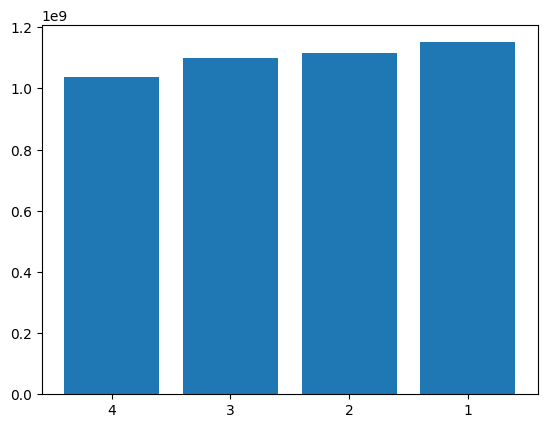

In [9]:
plt.bar(x=tabla_informacion_tiendas.sort_values(by="Ingresos totales")['Tiendas'], height=tabla_informacion_tiendas.sort_values(by="Ingresos totales")['Ingresos totales'])
plt.show()

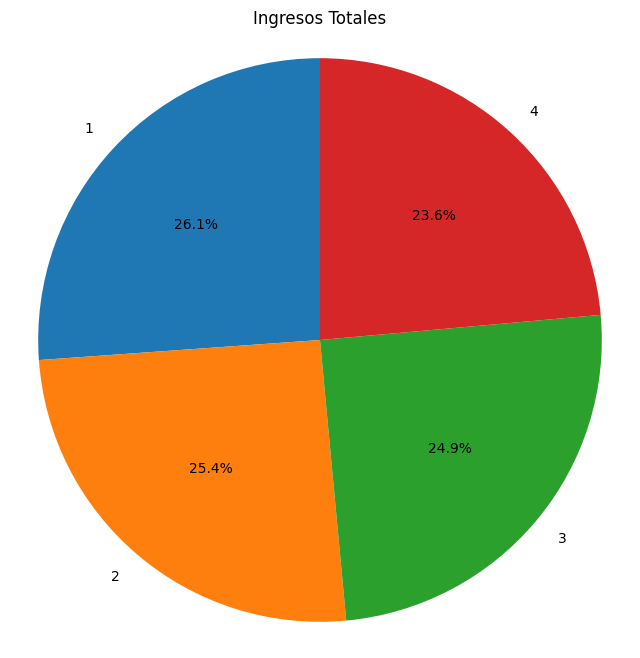

In [10]:
plt.figure(figsize=(8, 8))
plt.pie(tabla_informacion_tiendas['Ingresos totales'],
        labels=tabla_informacion_tiendas['Tiendas'],
        autopct='%1.1f%%',
        startangle=90)

plt.title('Ingresos Totales')
plt.axis('equal')
plt.show()

In [11]:
tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# 2. Ventas por categoría

In [85]:
cantidad_ventas_categoria_tienda1 = tienda.groupby('Categoría del Producto').size().reset_index(name='Cantidad Vendida')
cantidad_ventas_categoria_tienda1 = cantidad_ventas_categoria_tienda1.sort_values(by='Cantidad Vendida', ascending=False)
cantidad_ventas_categoria_tienda1

,Categoría del Producto,Cantidad Vendida
7,Muebles,465
3,Electrónicos,448
5,Juguetes,324
2,Electrodomésticos,312
1,Deportes y diversión,284
4,Instrumentos musicales,182
6,Libros,173
0,Artículos para el hogar,171


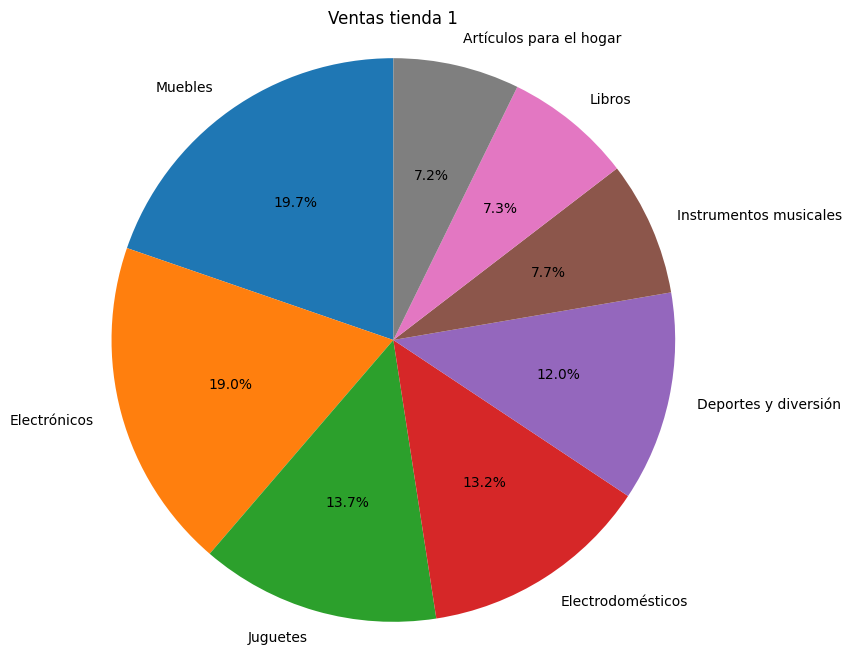

In [86]:
plt.figure(figsize=(8, 8))
plt.pie(cantidad_ventas_categoria_tienda1['Cantidad Vendida'],
        labels=cantidad_ventas_categoria_tienda1['Categoría del Producto'],
        autopct='%1.1f%%',
        startangle=90)

plt.title('Ventas tienda 1')
plt.axis('equal')
plt.show()

In [14]:
cantidad_ventas_categoria_tienda2 = tienda2.groupby('Categoría del Producto').size().reset_index(name='Cantidad Vendida')
cantidad_ventas_categoria_tienda2 = cantidad_ventas_categoria_tienda2.sort_values(by='Cantidad Vendida', ascending=False)
cantidad_ventas_categoria_tienda2

,Categoría del Producto,Cantidad Vendida
7,Muebles,442
3,Electrónicos,422
5,Juguetes,313
2,Electrodomésticos,305
1,Deportes y diversión,275
4,Instrumentos musicales,224
6,Libros,197
0,Artículos para el hogar,181


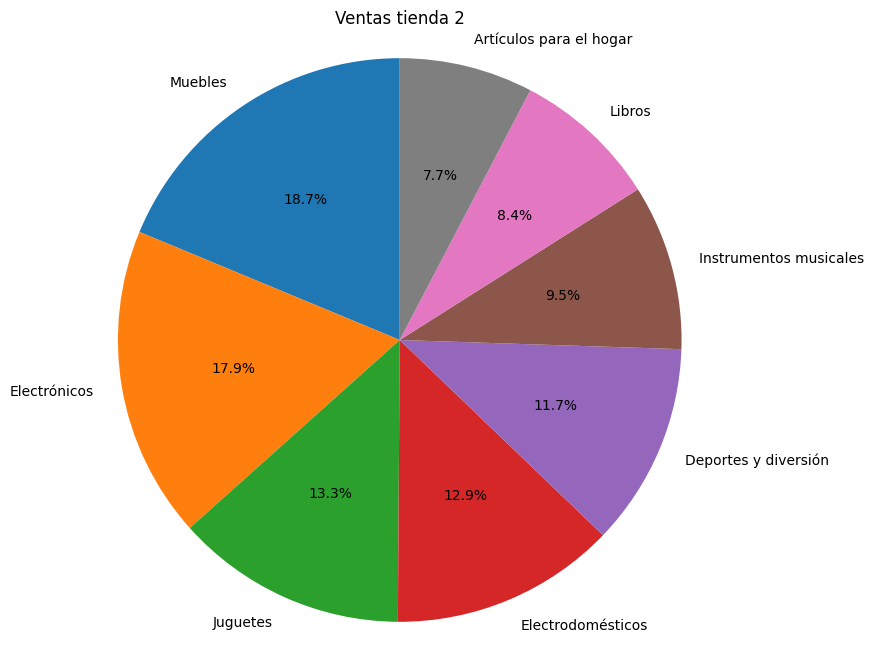

In [15]:
plt.figure(figsize=(8, 8))
plt.pie(cantidad_ventas_categoria_tienda2['Cantidad Vendida'],
        labels=cantidad_ventas_categoria_tienda2['Categoría del Producto'],
        autopct='%1.1f%%',
        startangle=90)

plt.title('Ventas tienda 2')
plt.axis('equal')
plt.show()

In [16]:
cantidad_ventas_categoria_tienda3 = tienda3.groupby('Categoría del Producto').size().reset_index(name='Cantidad Vendida')
cantidad_ventas_categoria_tienda3 = cantidad_ventas_categoria_tienda3.sort_values(by='Cantidad Vendida', ascending=False)
cantidad_ventas_categoria_tienda3

,Categoría del Producto,Cantidad Vendida
7,Muebles,499
3,Electrónicos,451
5,Juguetes,315
2,Electrodomésticos,278
1,Deportes y diversión,277
6,Libros,185
0,Artículos para el hogar,177
4,Instrumentos musicales,177


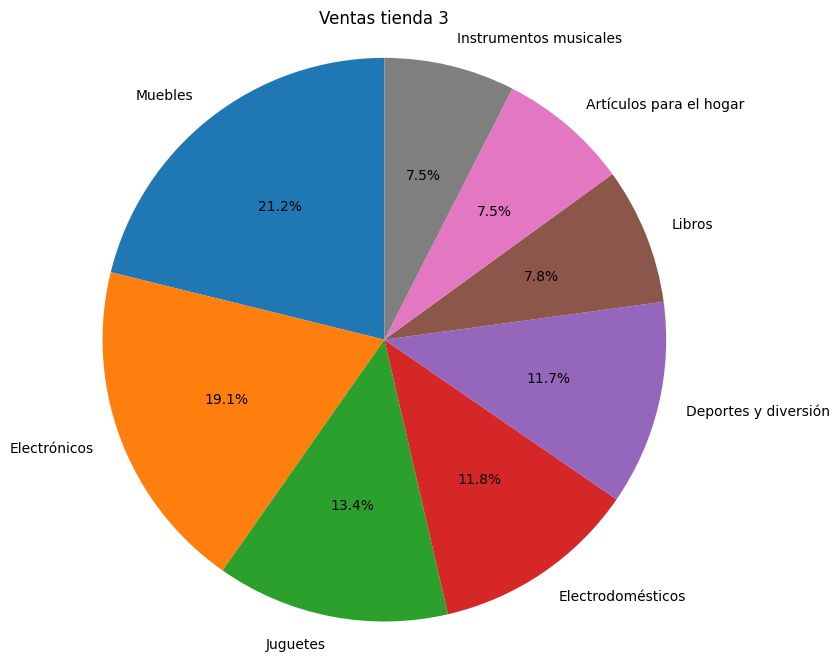

In [17]:
plt.figure(figsize=(8, 8))
plt.pie(cantidad_ventas_categoria_tienda3['Cantidad Vendida'],
        labels=cantidad_ventas_categoria_tienda3['Categoría del Producto'],
        autopct='%1.1f%%',
        startangle=90)

plt.title('Ventas tienda 3')
plt.axis('equal')
plt.show()

In [88]:
cantidad_ventas_categoria_tienda4 = tienda4.groupby('Categoría del Producto').size().reset_index(name='Cantidad Vendida')
cantidad_ventas_categoria_tienda4 = cantidad_ventas_categoria_tienda4.sort_values(by='Cantidad Vendida', ascending=False)
cantidad_ventas_categoria_tienda4

,Categoría del Producto,Cantidad Vendida
7,Muebles,480
3,Electrónicos,451
5,Juguetes,338
1,Deportes y diversión,277
2,Electrodomésticos,254
0,Artículos para el hogar,201
6,Libros,187
4,Instrumentos musicales,170


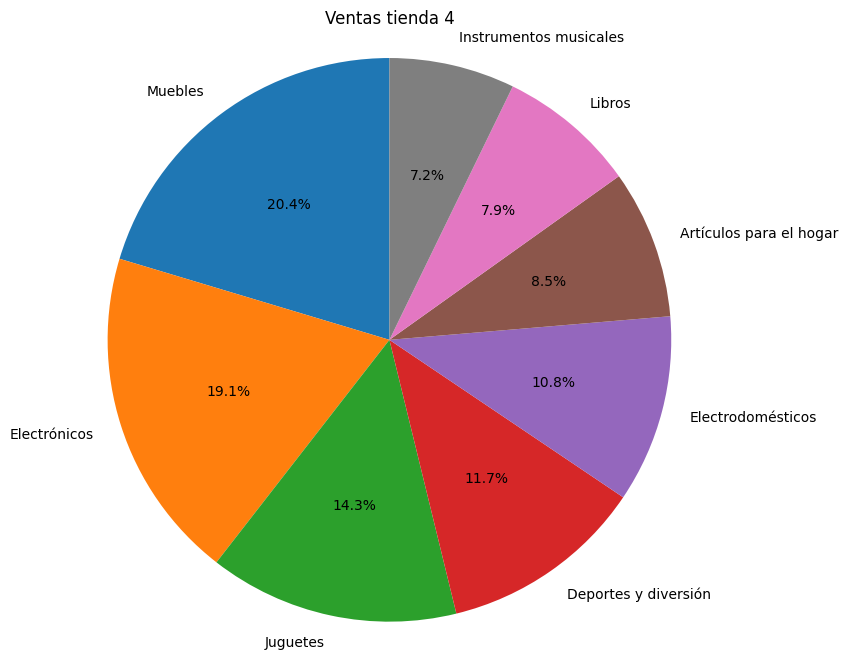

In [89]:
plt.figure(figsize=(8, 8))
plt.pie(cantidad_ventas_categoria_tienda4['Cantidad Vendida'],
        labels=cantidad_ventas_categoria_tienda4['Categoría del Producto'],
        autopct='%1.1f%%',
        startangle=90)

plt.title('Ventas tienda 4')
plt.axis('equal')
plt.show()

In [93]:
cantidad_ventas_categoria_tiendas = tiendas.groupby('Categoría del Producto').size().reset_index(name='Cantidad Vendida')
cantidad_ventas_categoria_tiendas = cantidad_ventas_categoria_tiendas.sort_values(by='Cantidad Vendida', ascending=False)
cantidad_ventas_categoria_tiendas

,Categoría del Producto,Cantidad Vendida
7,Muebles,1886
3,Electrónicos,1772
5,Juguetes,1290
2,Electrodomésticos,1149
1,Deportes y diversión,1113
4,Instrumentos musicales,753
6,Libros,742
0,Artículos para el hogar,730


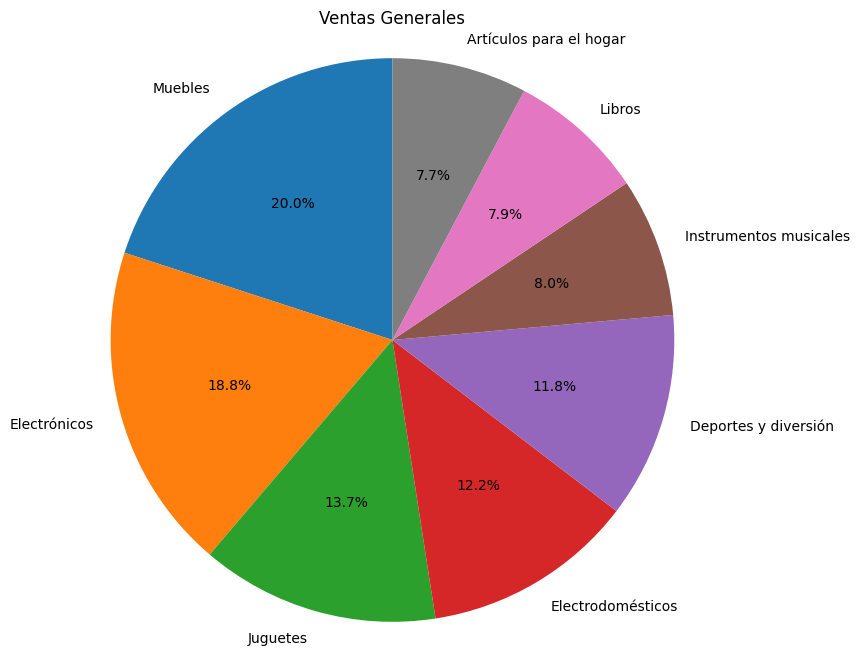

In [94]:
plt.figure(figsize=(8, 8))
plt.pie(cantidad_ventas_categoria_tiendas['Cantidad Vendida'],
        labels=cantidad_ventas_categoria_tiendas['Categoría del Producto'],
        autopct='%1.1f%%',
        startangle=90)

plt.title('Ventas Generales')
plt.axis('equal')
plt.show()

In [22]:
ventas_categoria_tienda1= tienda.groupby('Categoría del Producto')['Precio'].sum().reset_index()
ventas_categoria_tienda1 = ventas_categoria_tienda1.sort_values(by='Precio', ascending=False)
ventas_categoria_tienda1

,Categoría del Producto,Precio
3,Electrónicos,429493500.0
2,Electrodomésticos,363685200.0
7,Muebles,187633700.0
4,Instrumentos musicales,91299000.0
1,Deportes y diversión,39290000.0
5,Juguetes,17995700.0
0,Artículos para el hogar,12698400.0
6,Libros,8784900.0


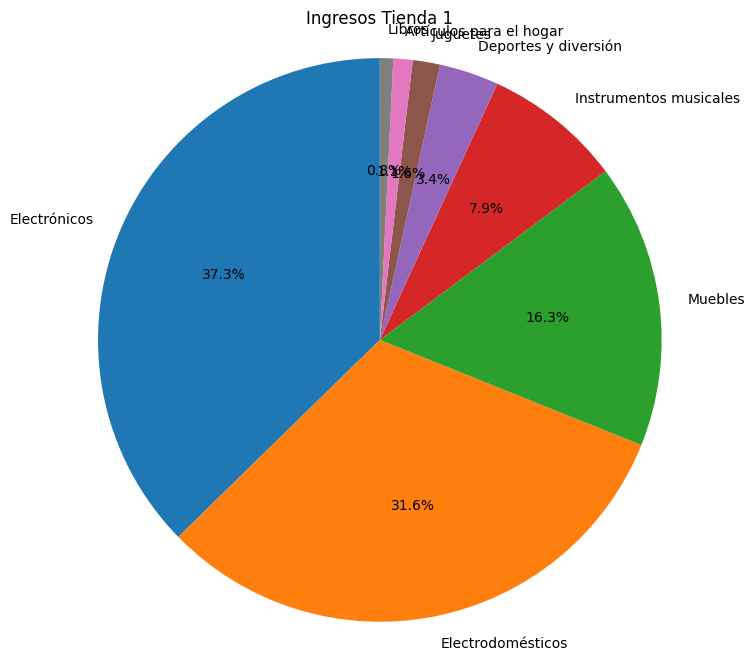

In [23]:
plt.figure(figsize=(8, 8))
plt.pie(ventas_categoria_tienda1['Precio'],
        labels=ventas_categoria_tienda1['Categoría del Producto'],
        autopct='%1.1f%%',
        startangle=90)

plt.title('Ingresos Tienda 1')
plt.axis('equal')
plt.show()


In [24]:
ventas_categoria_tienda2= tienda2.groupby('Categoría del Producto')['Precio'].sum().reset_index()
ventas_categoria_tienda2 = ventas_categoria_tienda2.sort_values(by='Precio', ascending=False)
ventas_categoria_tienda2

,Categoría del Producto,Precio
3,Electrónicos,410831100.0
2,Electrodomésticos,348567800.0
7,Muebles,176426300.0
4,Instrumentos musicales,104990300.0
1,Deportes y diversión,34744500.0
5,Juguetes,15945400.0
0,Artículos para el hogar,14746900.0
6,Libros,10091200.0


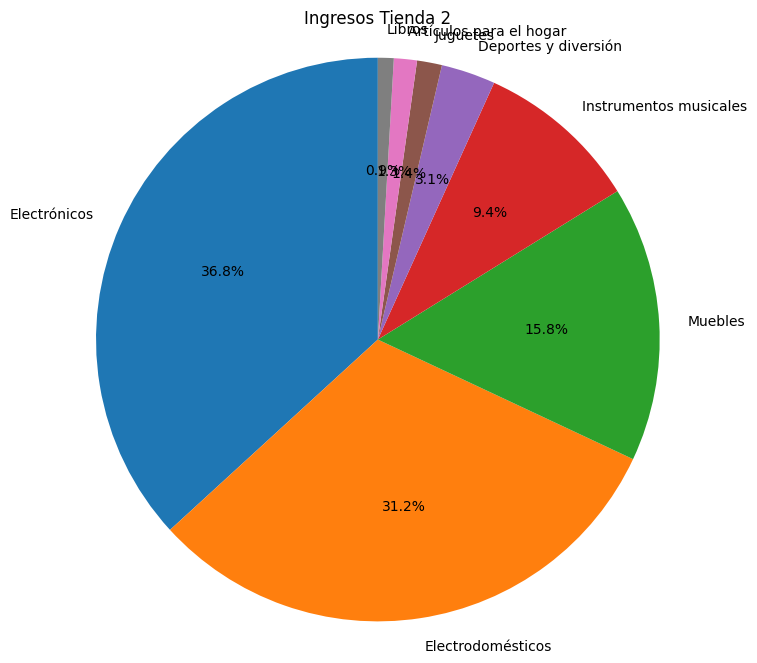

In [25]:
plt.figure(figsize=(8, 8))
plt.pie(ventas_categoria_tienda2['Precio'],
        labels=ventas_categoria_tienda2['Categoría del Producto'],
        autopct='%1.1f%%',
        startangle=90)

plt.title('Ingresos Tienda 2')
plt.axis('equal')
plt.show()

In [26]:
ventas_categoria_tienda3= tienda3.groupby('Categoría del Producto')['Precio'].sum().reset_index()
ventas_categoria_tienda3 = ventas_categoria_tienda3.sort_values(by='Precio', ascending=False)
ventas_categoria_tienda3

,Categoría del Producto,Precio
3,Electrónicos,410775800.0
2,Electrodomésticos,329237900.0
7,Muebles,201072100.0
4,Instrumentos musicales,77380900.0
1,Deportes y diversión,35593100.0
5,Juguetes,19401100.0
0,Artículos para el hogar,15060000.0
6,Libros,9498700.0


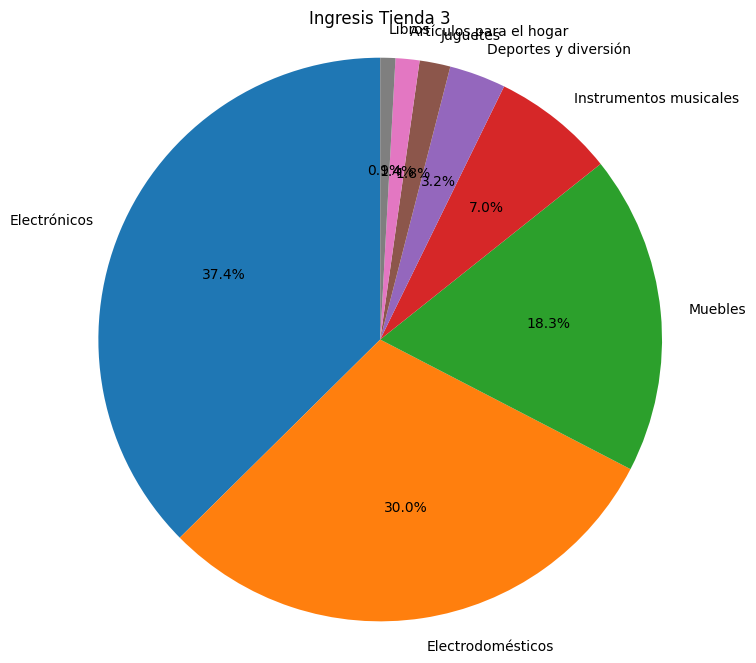

In [27]:
plt.figure(figsize=(8, 8))
plt.pie(ventas_categoria_tienda3['Precio'],
        labels=ventas_categoria_tienda3['Categoría del Producto'],
        autopct='%1.1f%%',
        startangle=90)

plt.title('Ingresis Tienda 3')
plt.axis('equal')
plt.show()

In [28]:
ventas_categoria_tienda4= tienda4.groupby('Categoría del Producto')['Precio'].sum().reset_index()
ventas_categoria_tienda4 = ventas_categoria_tienda4.sort_values(by='Precio', ascending=False)
ventas_categoria_tienda4

,Categoría del Producto,Precio
3,Electrónicos,409476100.0
2,Electrodomésticos,283260200.0
7,Muebles,192528900.0
4,Instrumentos musicales,75102400.0
1,Deportes y diversión,33350100.0
5,Juguetes,20262200.0
0,Artículos para el hogar,15074500.0
6,Libros,9321300.0


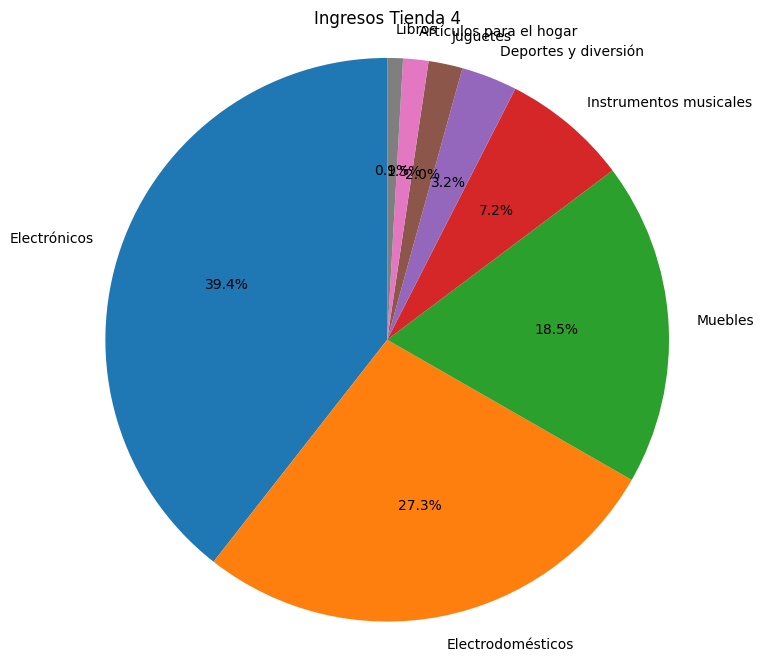

In [29]:
plt.figure(figsize=(8, 8))
plt.pie(ventas_categoria_tienda4['Precio'],
        labels=ventas_categoria_tienda4['Categoría del Producto'],
        autopct='%1.1f%%',
        startangle=90)

plt.title('Ingresos Tienda 4')
plt.axis('equal')
plt.show()

In [30]:
ventas_categoria_tiendas= tiendas.groupby('Categoría del Producto')['Precio'].sum().reset_index()
ventas_categoria_tiendas = ventas_categoria_tiendas.sort_values(by='Precio', ascending=False)
ventas_categoria_tiendas

,Categoría del Producto,Precio
3,Electrónicos,1.660576e+09
2,Electrodomésticos,1.324751e+09
7,Muebles,7.576610e+08
4,Instrumentos musicales,3.487726e+08
1,Deportes y diversión,1.429777e+08
5,Juguetes,7.360440e+07
0,Artículos para el hogar,5.757980e+07
6,Libros,3.769610e+07


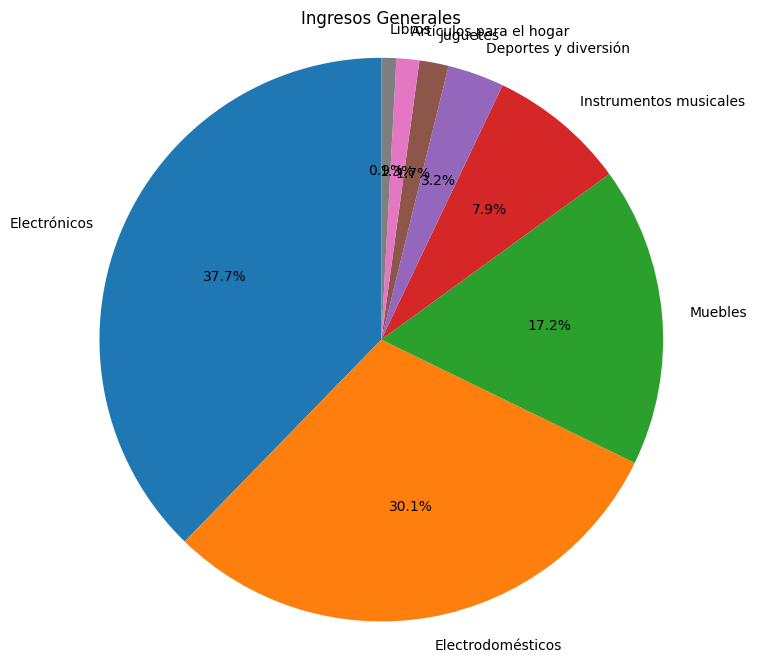

In [31]:
plt.figure(figsize=(8, 8))
plt.pie(ventas_categoria_tiendas['Precio'],
        labels=ventas_categoria_tiendas['Categoría del Producto'],
        autopct='%1.1f%%',
        startangle=90)

plt.title('Ingresos Generales')
plt.axis('equal')
plt.show()

# 3. Calificación promedio de la tienda


In [32]:
valoraciones_promedio_tienda1= tienda.groupby('Categoría del Producto')['Calificación'].mean().reset_index()
valoraciones_promedio_tienda1= valoraciones_promedio_tienda1.sort_values(by='Calificación', ascending=True)
valoraciones_promedio_tienda1

,Categoría del Producto,Calificación
0,Artículos para el hogar,3.748538
1,Deportes y diversión,3.897887
7,Muebles,3.946237
6,Libros,3.976879
3,Electrónicos,4.004464
2,Electrodomésticos,4.032051
4,Instrumentos musicales,4.049451
5,Juguetes,4.077160


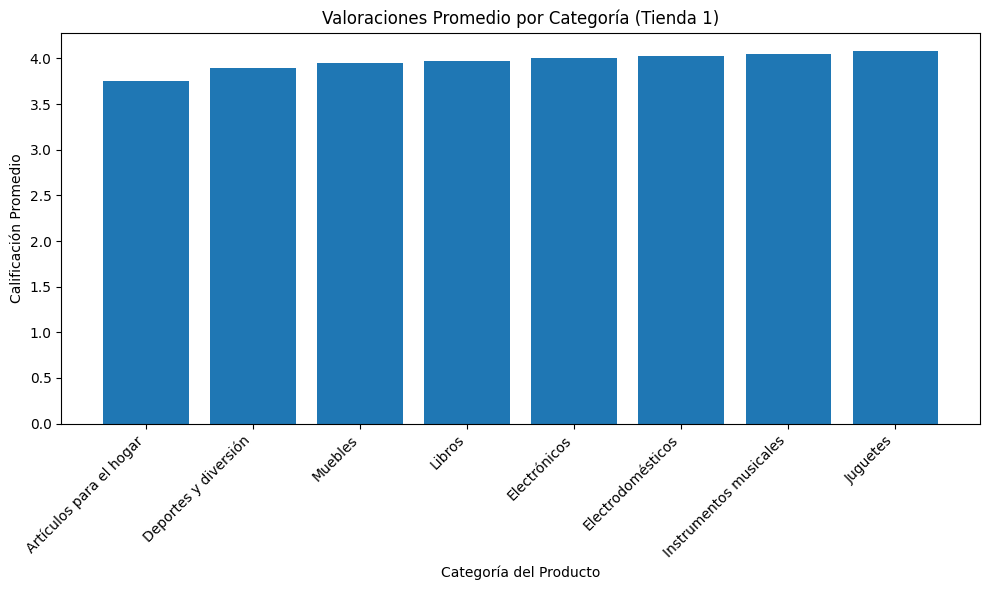

In [33]:
plt.figure(figsize=(10, 6))

plt.bar(x=valoraciones_promedio_tienda1['Categoría del Producto'],
        height=valoraciones_promedio_tienda1['Calificación'])

plt.xticks(rotation=45, ha='right')

plt.title('Valoraciones Promedio por Categoría (Tienda 1)')
plt.xlabel('Categoría del Producto')
plt.ylabel('Calificación Promedio')

plt.tight_layout()
plt.show()

In [34]:
valoraciones_promedio_tienda2= tienda2.groupby('Categoría del Producto')['Calificación'].mean().reset_index()
valoraciones_promedio_tienda2= valoraciones_promedio_tienda2.sort_values(by='Calificación', ascending=True)
valoraciones_promedio_tienda2

,Categoría del Producto,Calificación
6,Libros,3.949239
3,Electrónicos,3.971564
5,Juguetes,4.025559
4,Instrumentos musicales,4.035714
1,Deportes y diversión,4.065455
0,Artículos para el hogar,4.071823
2,Electrodomésticos,4.072131
7,Muebles,4.092760


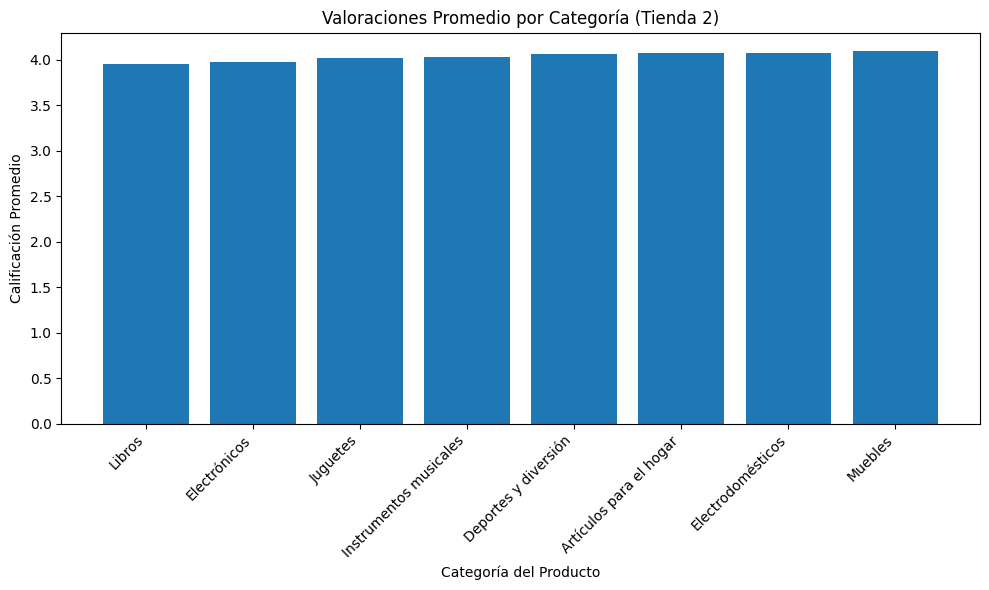

In [35]:
plt.figure(figsize=(10, 6))

plt.bar(x=valoraciones_promedio_tienda2['Categoría del Producto'],
        height=valoraciones_promedio_tienda2['Calificación'])

plt.xticks(rotation=45, ha='right')

plt.title('Valoraciones Promedio por Categoría (Tienda 2)')
plt.xlabel('Categoría del Producto')
plt.ylabel('Calificación Promedio')

plt.tight_layout()
plt.show()

In [36]:
valoraciones_promedio_tienda3= tienda3.groupby('Categoría del Producto')['Calificación'].mean().reset_index()
valoraciones_promedio_tienda3= valoraciones_promedio_tienda3.sort_values(by='Calificación', ascending=True)
valoraciones_promedio_tienda3

,Categoría del Producto,Calificación
1,Deportes y diversión,3.938628
3,Electrónicos,3.986696
4,Instrumentos musicales,4.005650
2,Electrodomésticos,4.010791
6,Libros,4.048649
0,Artículos para el hogar,4.073446
7,Muebles,4.098196
5,Juguetes,4.196825


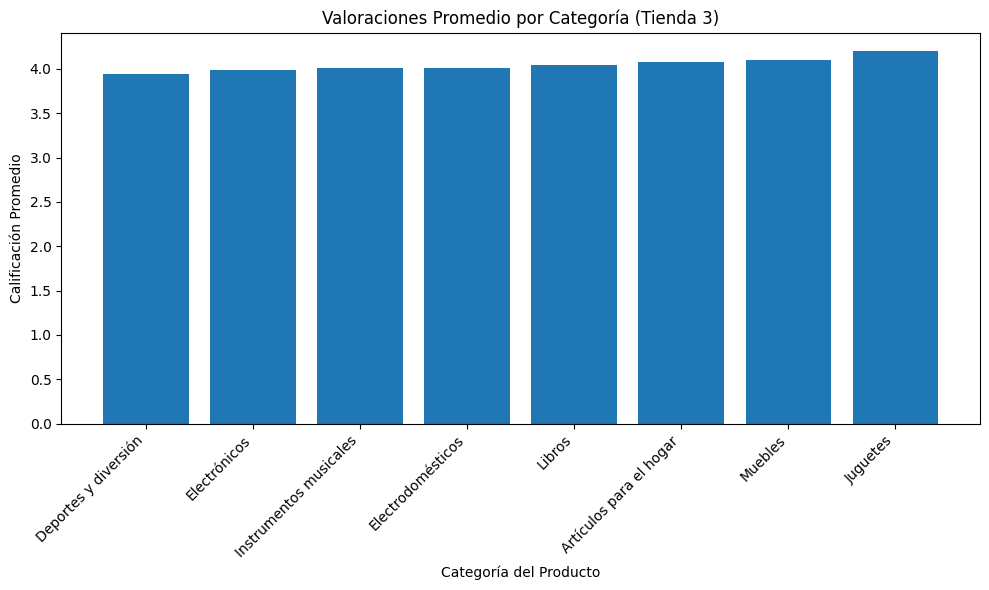

In [37]:
plt.figure(figsize=(10, 6))

plt.bar(x=valoraciones_promedio_tienda3['Categoría del Producto'],
        height=valoraciones_promedio_tienda3['Calificación'])

plt.xticks(rotation=45, ha='right')

plt.title('Valoraciones Promedio por Categoría (Tienda 3)')
plt.xlabel('Categoría del Producto')
plt.ylabel('Calificación Promedio')

plt.tight_layout()
plt.show()

In [38]:
valoraciones_promedio_tienda4= tienda4.groupby('Categoría del Producto')['Calificación'].mean().reset_index()
valoraciones_promedio_tienda4= valoraciones_promedio_tienda4.sort_values(by='Calificación', ascending=True)
valoraciones_promedio_tienda4

,Categoría del Producto,Calificación
4,Instrumentos musicales,3.911765
2,Electrodomésticos,3.929134
5,Juguetes,3.988166
7,Muebles,3.997917
3,Electrónicos,4.006652
0,Artículos para el hogar,4.009950
6,Libros,4.042781
1,Deportes y diversión,4.054152


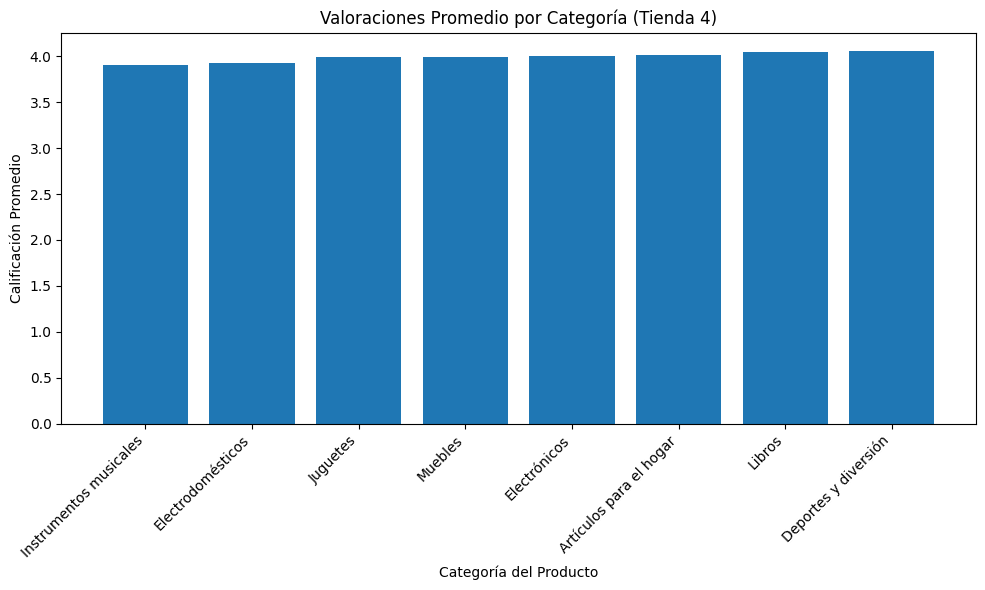

In [39]:
plt.figure(figsize=(10, 6))

plt.bar(x=valoraciones_promedio_tienda4['Categoría del Producto'],
        height=valoraciones_promedio_tienda4['Calificación'])

plt.xticks(rotation=45, ha='right')

plt.title('Valoraciones Promedio por Categoría (Tienda 4)')
plt.xlabel('Categoría del Producto')
plt.ylabel('Calificación Promedio')

plt.tight_layout()
plt.show()

In [40]:
valoraciones_promedio_tiendas= tiendas.groupby('Categoría del Producto')['Calificación'].mean().reset_index()
valoraciones_promedio_tiendas= valoraciones_promedio_tiendas.sort_values(by='Calificación', ascending=True)
valoraciones_promedio_tiendas

,Categoría del Producto,Calificación
0,Artículos para el hogar,3.979452
1,Deportes y diversión,3.988320
3,Electrónicos,3.992664
4,Instrumentos musicales,4.003984
6,Libros,4.004043
2,Electrodomésticos,4.014795
7,Muebles,4.033934
5,Juguetes,4.070543


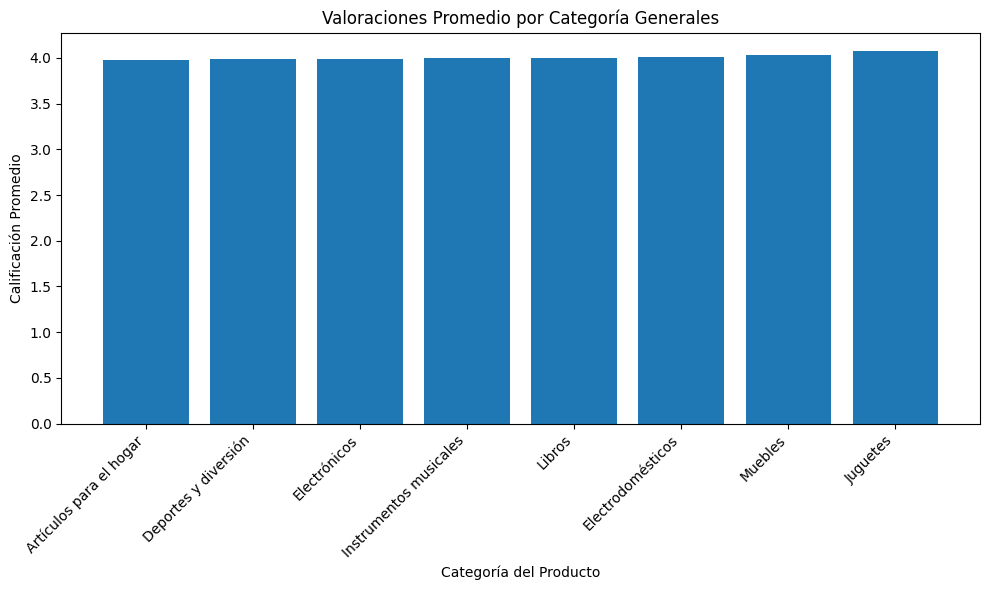

In [41]:
plt.figure(figsize=(10, 6))

plt.bar(x=valoraciones_promedio_tiendas['Categoría del Producto'],
        height=valoraciones_promedio_tiendas['Calificación'])

plt.xticks(rotation=45, ha='right')

plt.title('Valoraciones Promedio por Categoría Generales')
plt.xlabel('Categoría del Producto')
plt.ylabel('Calificación Promedio')

plt.tight_layout()
plt.show()

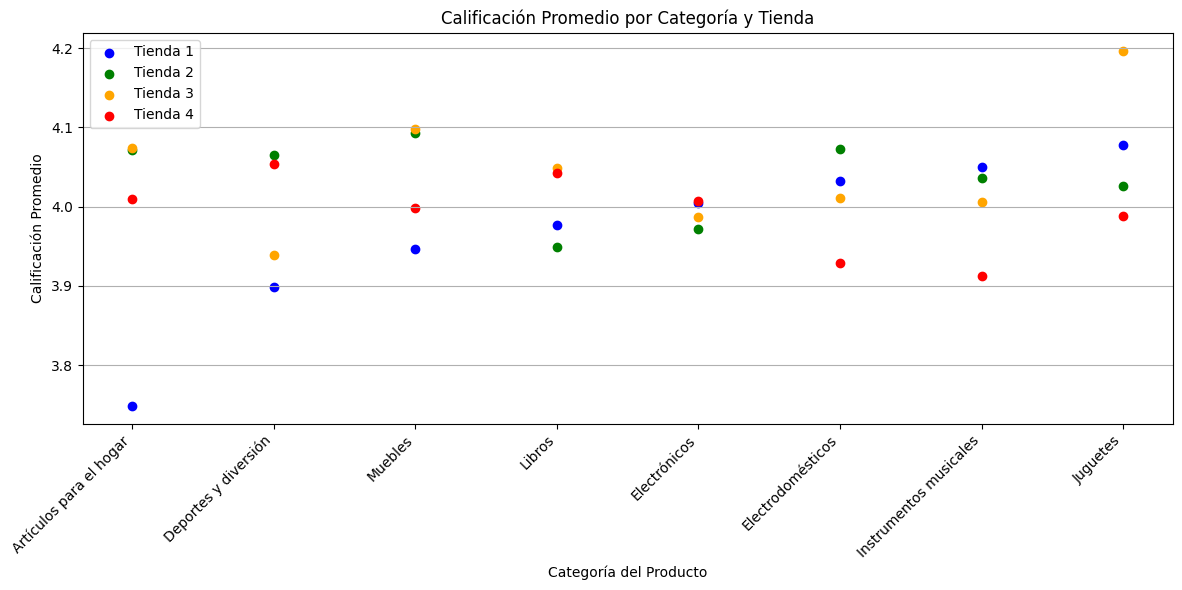

In [42]:
categorias = valoraciones_promedio_tienda1['Categoría del Producto'].tolist()

x_pos = {categoria: i for i, categoria in enumerate(categorias)}

def map_x(df):
    return df['Categoría del Producto'].map(x_pos)

plt.figure(figsize=(12, 6))

plt.scatter(map_x(valoraciones_promedio_tienda1), valoraciones_promedio_tienda1['Calificación'], label='Tienda 1', color='blue')
plt.scatter(map_x(valoraciones_promedio_tienda2), valoraciones_promedio_tienda2['Calificación'], label='Tienda 2', color='green')
plt.scatter(map_x(valoraciones_promedio_tienda3), valoraciones_promedio_tienda3['Calificación'], label='Tienda 3', color='orange')
plt.scatter(map_x(valoraciones_promedio_tienda4), valoraciones_promedio_tienda4['Calificación'], label='Tienda 4', color='red')

plt.xticks(ticks=range(len(categorias)), labels=categorias, rotation=45, ha='right')

plt.ylabel('Calificación Promedio')
plt.xlabel('Categoría del Producto')
plt.title('Calificación Promedio por Categoría y Tienda')
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [43]:
calificacion_promedio_tienda1=tienda['Calificación'].mean()
calificacion_promedio_tienda2=tienda2['Calificación'].mean()
calificacion_promedio_tienda3=tienda3['Calificación'].mean()
calificacion_promedio_tienda4=tienda4['Calificación'].mean()
calificaion_promedio_tiendas = {
    "Tiendas": ["1", "2", "3", "4"],
    "Valoracion": [calificacion_promedio_tienda1, calificacion_promedio_tienda2, calificacion_promedio_tienda3, calificacion_promedio_tienda4]
}

tabla_valoracion_tiendas = pd.DataFrame(calificaion_promedio_tiendas)
tabla_valoracion_tiendas.sort_values(by="Valoracion")

,Tiendas,Valoracion
0,1,3.976685
3,4,3.995759
1,2,4.037304
2,3,4.048326


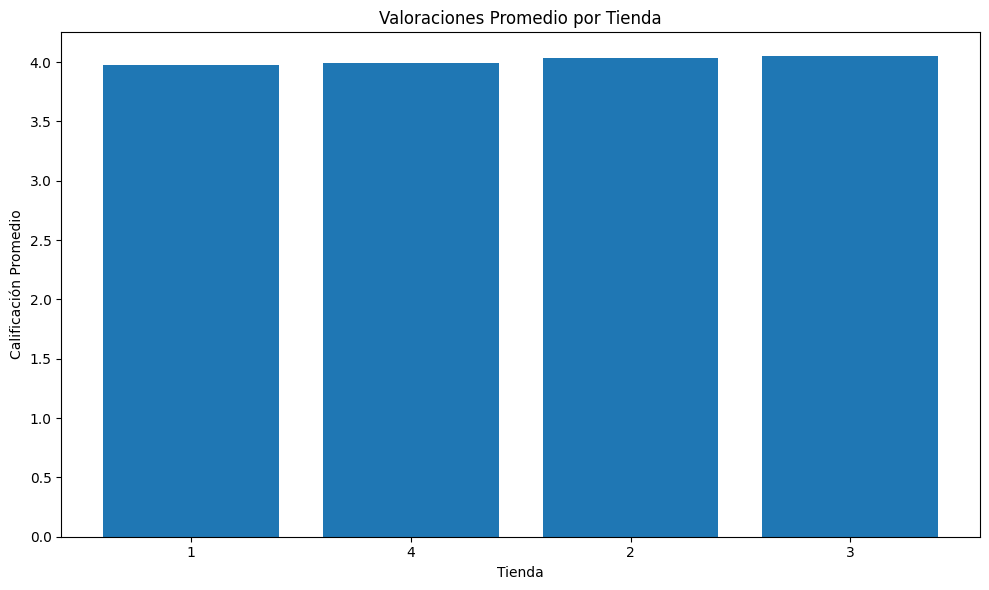

In [44]:
plt.figure(figsize=(10, 6))

plt.bar(x=tabla_valoracion_tiendas.sort_values(by="Valoracion")['Tiendas'],
        height=tabla_valoracion_tiendas.sort_values(by="Valoracion")['Valoracion'])

plt.title('Valoraciones Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')

plt.tight_layout()
plt.show()

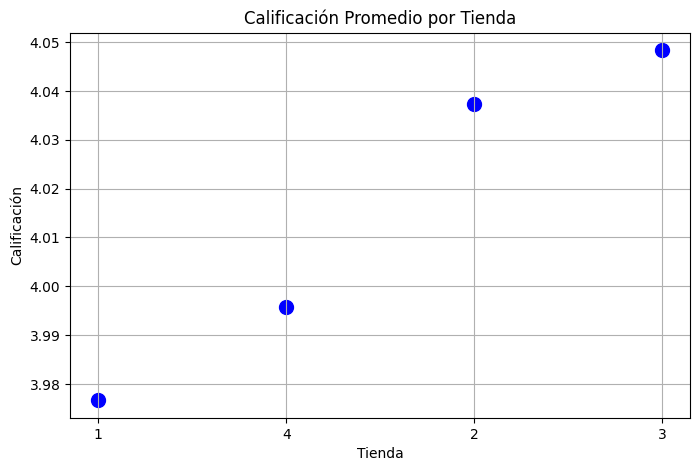

In [45]:
plt.figure(figsize=(8, 5))
plt.scatter(tabla_valoracion_tiendas.sort_values(by="Valoracion")['Tiendas'], tabla_valoracion_tiendas.sort_values(by="Valoracion")['Valoracion'], color='blue', s=100)

plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación')
plt.grid(True)
plt.show()

# 4. Productos más y menos vendidos

In [65]:
cantidad_ventas_categoria_tienda1 = tienda.groupby('Producto').size().reset_index(name='Cantidad Vendida1')
cantidad_ventas_categoria_tienda1 = cantidad_ventas_categoria_tienda1.sort_values(by='Cantidad Vendida1', ascending=False)
cantidad_ventas_categoria_tienda1

,Producto,Cantidad Vendida1
1,Armario,60
48,TV LED UHD 4K,60
33,Microondas,60
40,Secadora de ropa,58
32,Mesa de noche,56
9,Bloques de construcción,56
5,Balón de baloncesto,55
8,Bicicleta,54
23,Impresora,54
50,Vaso térmico,54


In [64]:
cantidad_ventas_categoria_tienda2 = tienda2.groupby('Producto').size().reset_index(name='Cantidad Vendida2')
cantidad_ventas_categoria_tienda2 = cantidad_ventas_categoria_tienda2.sort_values(by='Cantidad Vendida2', ascending=False)
cantidad_ventas_categoria_tienda2

,Producto,Cantidad Vendida2
24,Iniciando en programación,65
33,Microondas,62
7,Batería,61
38,Pandereta,58
21,Guitarra acústica,58
40,Secadora de ropa,57
25,Iphone 15,55
9,Bloques de construcción,54
1,Armario,54
41,Set de ollas,52


In [63]:
cantidad_ventas_categoria_tienda3 = tienda3.groupby('Producto').size().reset_index(name='Cantidad Vendida3')
cantidad_ventas_categoria_tienda3 = cantidad_ventas_categoria_tienda3.sort_values(by='Cantidad Vendida3', ascending=False)
cantidad_ventas_categoria_tienda3

,Producto,Cantidad Vendida3
27,Kit de bancas,57
31,Mesa de comedor,56
11,Cama king,56
41,Set de ollas,55
32,Mesa de noche,55
45,Smart TV,54
35,Modelado predictivo,53
17,Cuerda para saltar,53
20,Estufa,53
12,Carrito de control remoto,52


In [62]:
cantidad_ventas_categoria_tienda4 = tienda4.groupby('Producto').size().reset_index(name='Cantidad Vendida3')
cantidad_ventas_categoria_tienda4 = cantidad_ventas_categoria_tienda4.sort_values(by='Cantidad Vendida3', ascending=False)
cantidad_ventas_categoria_tienda4

,Producto,Cantidad Vendida3
10,Cama box,62
15,Cubertería,59
11,Cama king,56
18,Dashboards con Power BI,56
12,Carrito de control remoto,55
32,Mesa de noche,55
31,Mesa de comedor,55
9,Bloques de construcción,54
45,Smart TV,54
38,Pandereta,52


In [50]:
cantidad_ventas_categoria_tiendas = tiendas.groupby('Producto').size().reset_index(name='Cantidad Vendida')
cantidad_ventas_categoria_tiendas = cantidad_ventas_categoria_tiendas.sort_values(by='Cantidad Vendida', ascending=False)
cantidad_ventas_categoria_tiendas

,Producto,Cantidad Vendida
32,Mesa de noche,210
33,Microondas,206
12,Carrito de control remoto,206
7,Batería,203
11,Cama king,201
35,Modelado predictivo,200
40,Secadora de ropa,200
41,Set de ollas,200
10,Cama box,199
9,Bloques de construcción,199


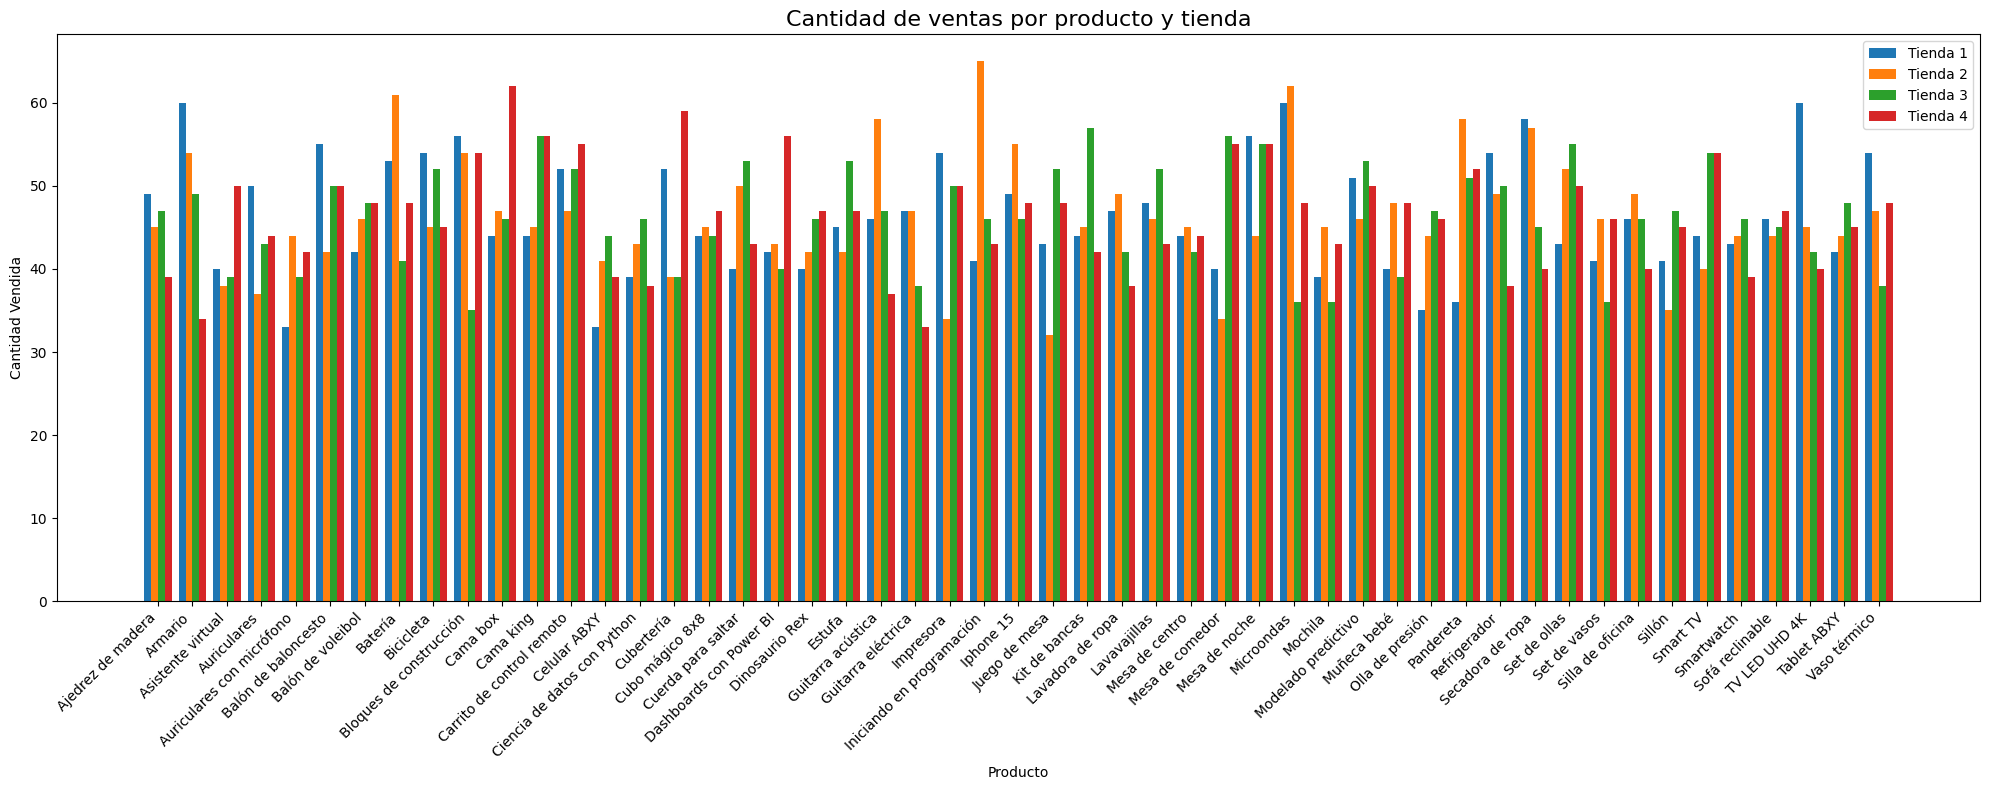

In [70]:
cantidad_ventas_categoria_tienda1 = tienda.groupby('Producto').size().reset_index(name='Tienda 1')
cantidad_ventas_categoria_tienda2 = tienda2.groupby('Producto').size().reset_index(name='Tienda 2')
cantidad_ventas_categoria_tienda3 = tienda3.groupby('Producto').size().reset_index(name='Tienda 3')
cantidad_ventas_categoria_tienda4 = tienda4.groupby('Producto').size().reset_index(name='Tienda 4')

df = cantidad_ventas_categoria_tienda1.merge(cantidad_ventas_categoria_tienda2, on='Producto', how='outer')
df = df.merge(cantidad_ventas_categoria_tienda3, on='Producto', how='outer')
df = df.merge(cantidad_ventas_categoria_tienda4, on='Producto', how='outer')

df.fillna(0, inplace=True)

plt.figure(figsize=(20, 8))

x = range(len(df['Producto']))
ancho = 0.2

plt.bar([p - 1.5*ancho for p in x], df['Tienda 1'], width=ancho, label='Tienda 1')
plt.bar([p - 0.5*ancho for p in x], df['Tienda 2'], width=ancho, label='Tienda 2')
plt.bar([p + 0.5*ancho for p in x], df['Tienda 3'], width=ancho, label='Tienda 3')
plt.bar([p + 1.5*ancho for p in x], df['Tienda 4'], width=ancho, label='Tienda 4')

plt.xticks(x, df['Producto'], rotation=45, ha='right')
plt.xlabel('Producto')
plt.ylabel('Cantidad Vendida')
plt.title('Cantidad de ventas por producto y tienda', fontsize=16)
plt.legend()

plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [73]:
costo_total_envio_tienda1=sum(tienda['Costo de envío'])
costo_total_envio_tienda2=sum(tienda2['Costo de envío'])
costo_total_envio_tienda3=sum(tienda3['Costo de envío'])
costo_total_envio_tienda4=sum(tienda4['Costo de envío'])
costo_total_envio_tiendas = {
    "Tiendas": ["1", "2", "3", "4"],
    "Costos de envio": [costo_total_envio_tienda1, costo_total_envio_tienda2, costo_total_envio_tienda3, costo_total_envio_tienda4]
}

tabla_costo_envios = pd.DataFrame(costo_total_envio_tiendas)
tabla_costo_envios.sort_values(by="Costos de envio")

,Tiendas,Costos de envio
3,4,55317400.0
2,3,58516600.0
1,2,59485100.0
0,1,61377900.0


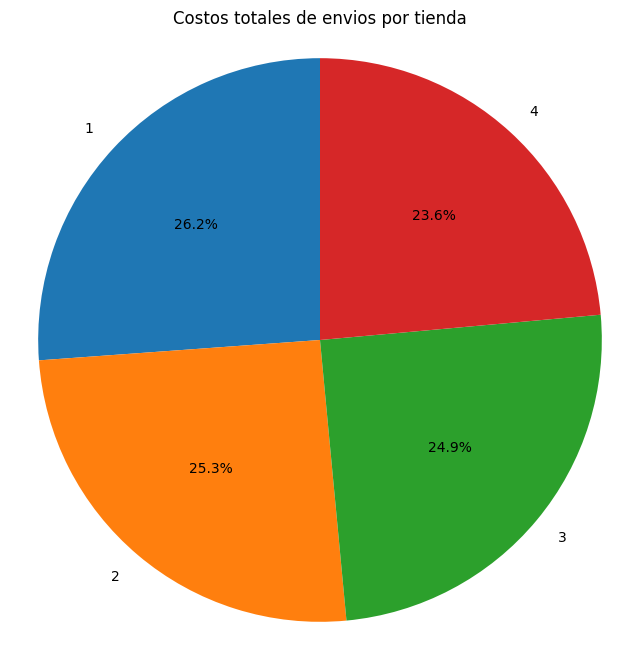

In [74]:
plt.figure(figsize=(8, 8))
plt.pie(costo_total_envio_tiendas['Costos de envio'],
        labels=costo_total_envio_tiendas['Tiendas'],
        autopct='%1.1f%%',
        startangle=90)

plt.title('Costos totales de envios por tienda')
plt.axis('equal')
plt.show()

In [75]:
costo_promedio_envio_tienda1=tienda['Costo de envío'].mean()
costo_promedio_envio_tienda2=tienda2['Costo de envío'].mean()
costo_promedio_envio_tienda3=tienda3['Costo de envío'].mean()
costo_promedio_envio_tienda4=tienda4['Costo de envío'].mean()
costo_promedio_envio_tiendas = {
    "Tiendas": ["1", "2", "3", "4"],
    "Costos de envio": [costo_promedio_envio_tienda1, costo_promedio_envio_tienda2, costo_promedio_envio_tienda3, costo_promedio_envio_tienda4]
}

tabla_costo_envios = pd.DataFrame(costo_promedio_envio_tiendas)
tabla_costo_envios.sort_values(by="Costos de envio")

,Tiendas,Costos de envio
3,4,23459.457167
2,3,24805.680373
1,2,25216.235693
0,1,26018.609580


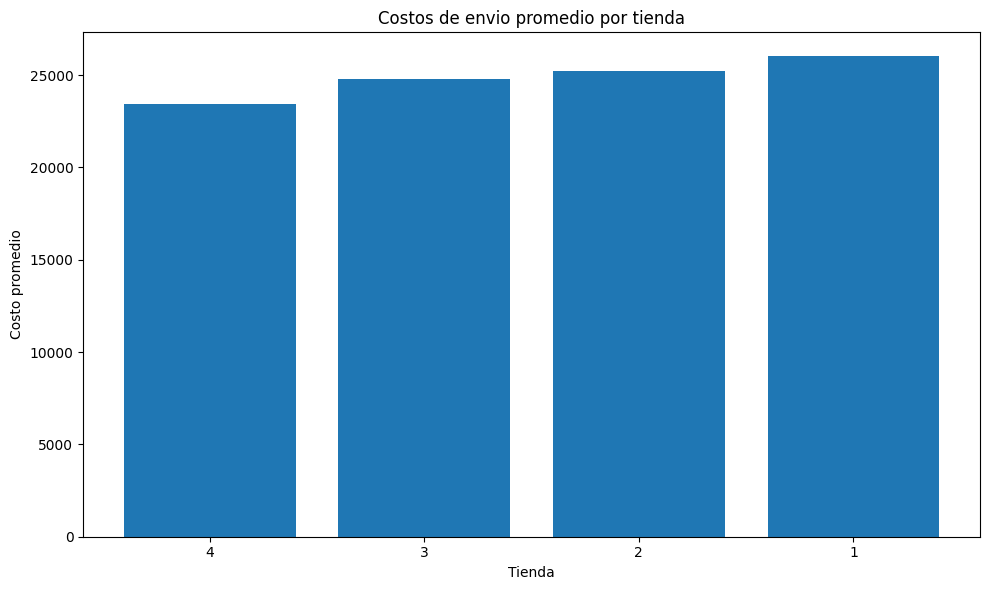

In [76]:
plt.figure(figsize=(10, 6))

plt.bar(x=tabla_costo_envios.sort_values(by="Costos de envio")['Tiendas'],
        height=tabla_costo_envios.sort_values(by="Costos de envio")['Costos de envio'])

plt.title('Costos de envio promedio por tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo promedio')

plt.tight_layout()
plt.show()

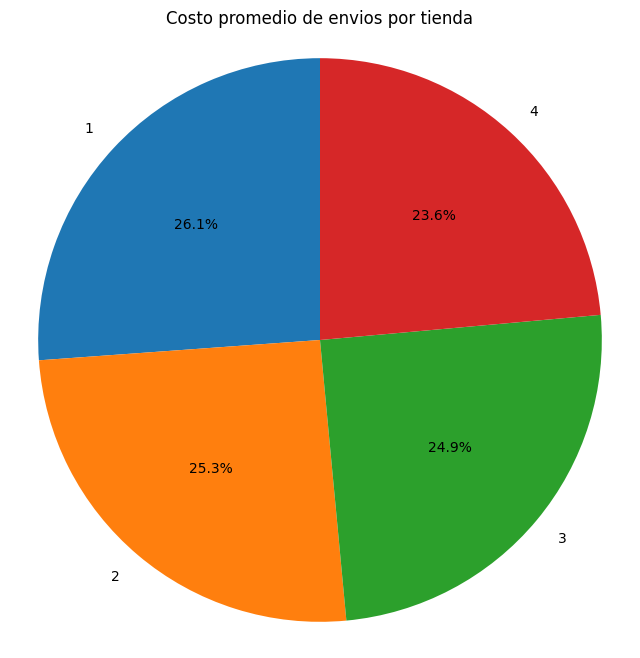

In [77]:
plt.figure(figsize=(8, 8))
plt.pie(costo_promedio_envio_tiendas['Costos de envio'],
        labels=costo_promedio_envio_tiendas['Tiendas'],
        autopct='%1.1f%%',
        startangle=90)

plt.title('Costo promedio de envios por tienda')
plt.axis('equal')
plt.show()

In [78]:
ingresos_menos_envios_tienda1 = ingresos_totales_tienda1-costo_total_envio_tienda1
ingresos_menos_envios_tienda2 = ingresos_totales_tienda2-costo_total_envio_tienda2
ingresos_menos_envios_tienda3 = ingresos_totales_tienda3-costo_total_envio_tienda3
ingresos_menos_envios_tienda4 = ingresos_totales_tienda4-costo_total_envio_tienda4
ingresos_menos_envios_tiendas = {
    "Tiendas": ["1", "2", "3", "4"],
    "Ingreso-Envios": [ingresos_menos_envios_tienda1, ingresos_menos_envios_tienda2, ingresos_menos_envios_tienda3, ingresos_menos_envios_tienda4]
}

tabla_ingresos_menos_envios = pd.DataFrame(ingresos_menos_envios_tiendas)
tabla_ingresos_menos_envios.sort_values(by="Ingreso-Envios")

,Tiendas,Ingreso-Envios
3,4,9.830583e+08
2,3,1.039503e+09
1,2,1.056858e+09
0,1,1.089502e+09


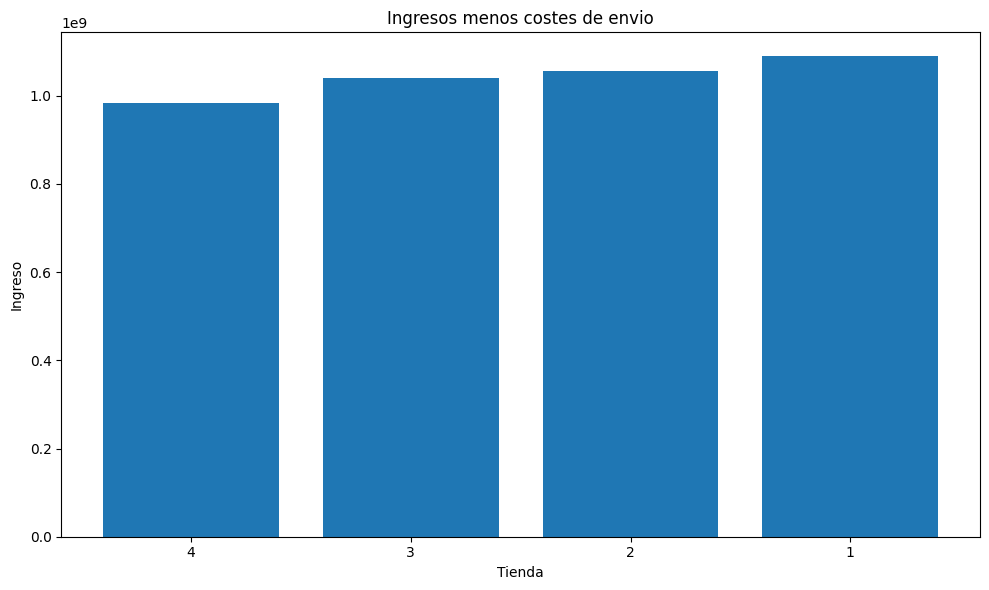

In [79]:
plt.figure(figsize=(10, 6))

plt.bar(x=tabla_ingresos_menos_envios.sort_values(by="Ingreso-Envios")['Tiendas'],
        height=tabla_ingresos_menos_envios.sort_values(by="Ingreso-Envios")['Ingreso-Envios'])

plt.title('Ingresos menos costes de envio')
plt.xlabel('Tienda')
plt.ylabel('Ingreso')

plt.tight_layout()
plt.show()

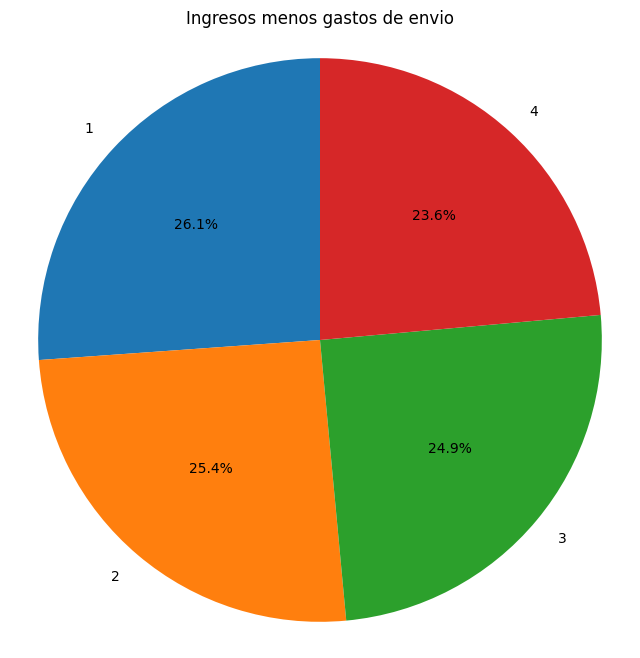

In [80]:
plt.figure(figsize=(8, 8))
plt.pie(ingresos_menos_envios_tiendas['Ingreso-Envios'],
        labels=ingresos_menos_envios_tiendas['Tiendas'],
        autopct='%1.1f%%',
        startangle=90)

plt.title('Ingresos menos gastos de envio')
plt.axis('equal')
plt.show()

# Informe Final


En este archivo se realizo el respectivo analisis a las 4 tiendas con el fin de poder ayudar en la decision al Sr. Juan sobre cual de esas dichas tiendas deberia de cerrar para que con ese dinero invertir en otro negiocio.

La tienda que considero es mejor cerrar es la tienda 4 debido a diversas razones



1. La tienda 4 es la tienda con menor facturacion de todas, representando un 23.6% de las ventas totales.




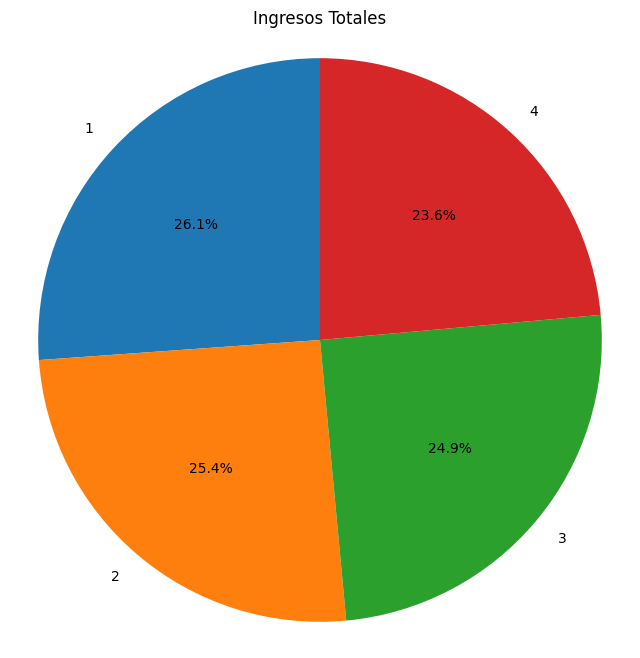

In [60]:
plt.figure(figsize=(8, 8))
plt.pie(tabla_informacion_tiendas['Ingresos totales'],
        labels=tabla_informacion_tiendas['Tiendas'],
        autopct='%1.1f%%',
        startangle=90)

plt.title('Ingresos Totales')
plt.axis('equal')
plt.show()


2. En cuanto a sus ventas por categoria, no varia mucho la distribucion de sus ventas respeto al resto.


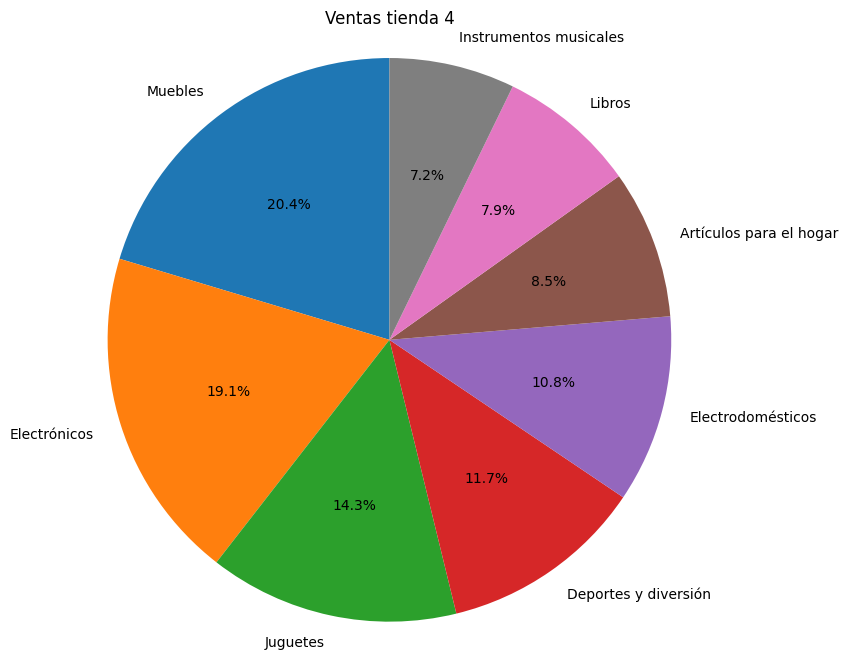

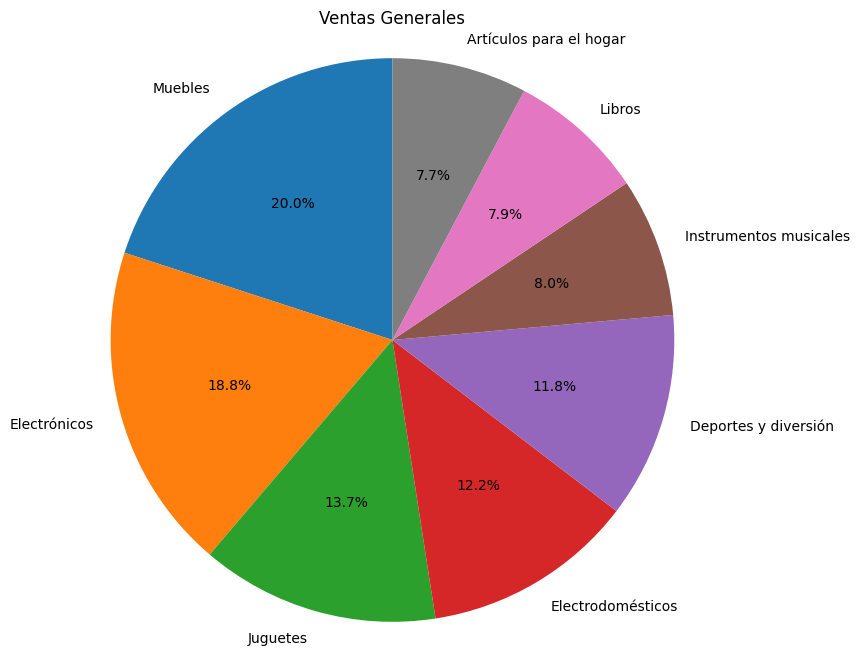

In [95]:
plt.figure(figsize=(8, 8))
plt.pie(cantidad_ventas_categoria_tienda4['Cantidad Vendida'],
        labels=cantidad_ventas_categoria_tienda4['Categoría del Producto'],
        autopct='%1.1f%%',
        startangle=90)

plt.title('Ventas tienda 4')
plt.axis('equal')
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(cantidad_ventas_categoria_tiendas['Cantidad Vendida'],
        labels=cantidad_ventas_categoria_tiendas['Categoría del Producto'],
        autopct='%1.1f%%',
        startangle=90)

plt.title('Ventas Generales')
plt.axis('equal')
plt.show()

3. Aunque la tienda 1 fue la peor calificada, esta lo compensa siendo la tienda que mas factura, representando un 26.1% de los ingresos totales, lo cual solo haria necesario mejorar l los servicios de la misma para incrementar aun mas sus ventas, pero por otro lado, la tienda 4 no solo es la de menor facturacion, tambien es la segunda peor valorada de todas.


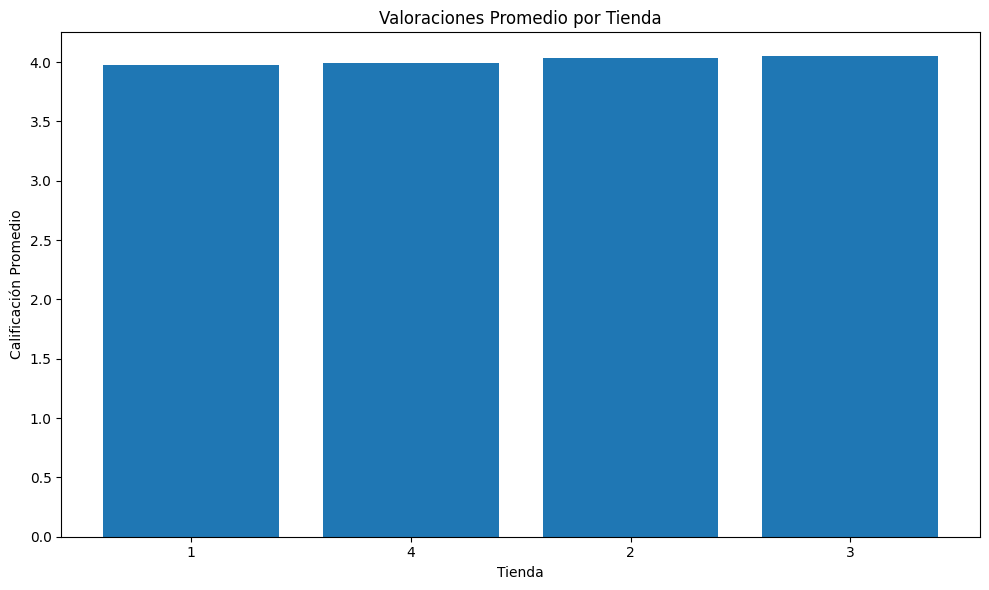

In [96]:
plt.figure(figsize=(10, 6))

plt.bar(x=tabla_valoracion_tiendas.sort_values(by="Valoracion")['Tiendas'],
        height=tabla_valoracion_tiendas.sort_values(by="Valoracion")['Valoracion'])

plt.title('Valoraciones Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')

plt.tight_layout()
plt.show()

4. Solo destaca en la venta de cama box y cuberteria, en lo demas es sus ventas son premedio o por debajo de este.

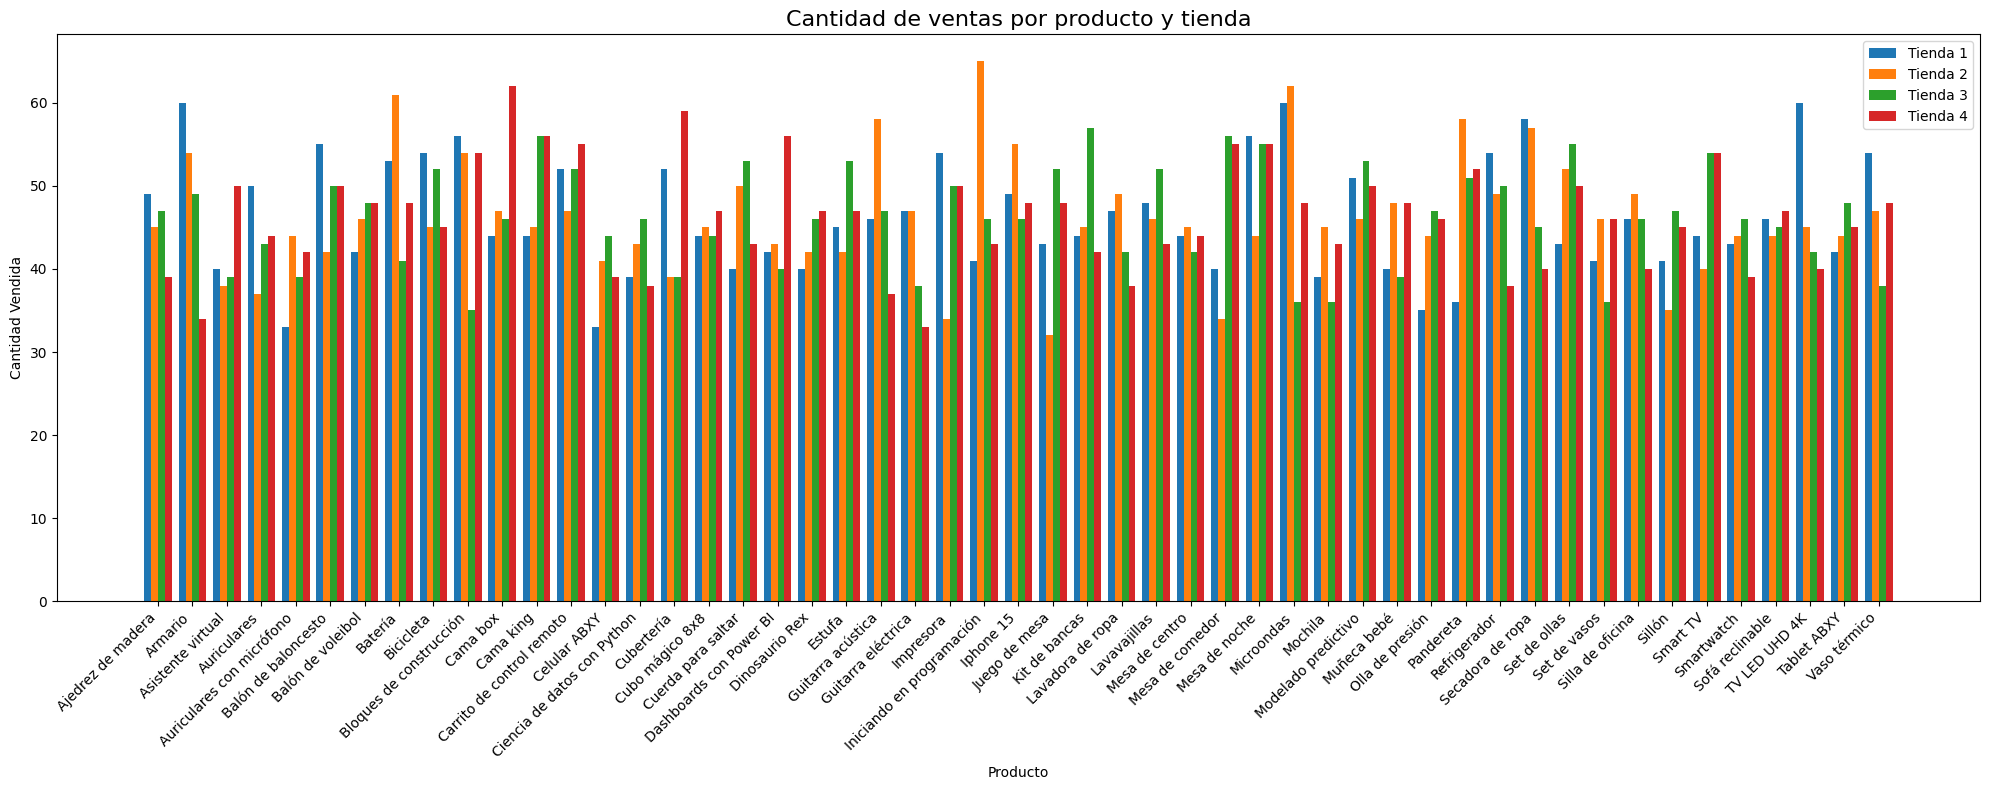

In [97]:
cantidad_ventas_categoria_tienda1 = tienda.groupby('Producto').size().reset_index(name='Tienda 1')
cantidad_ventas_categoria_tienda2 = tienda2.groupby('Producto').size().reset_index(name='Tienda 2')
cantidad_ventas_categoria_tienda3 = tienda3.groupby('Producto').size().reset_index(name='Tienda 3')
cantidad_ventas_categoria_tienda4 = tienda4.groupby('Producto').size().reset_index(name='Tienda 4')

df = cantidad_ventas_categoria_tienda1.merge(cantidad_ventas_categoria_tienda2, on='Producto', how='outer')
df = df.merge(cantidad_ventas_categoria_tienda3, on='Producto', how='outer')
df = df.merge(cantidad_ventas_categoria_tienda4, on='Producto', how='outer')

df.fillna(0, inplace=True)

plt.figure(figsize=(20, 8))

x = range(len(df['Producto']))
ancho = 0.2

plt.bar([p - 1.5*ancho for p in x], df['Tienda 1'], width=ancho, label='Tienda 1')
plt.bar([p - 0.5*ancho for p in x], df['Tienda 2'], width=ancho, label='Tienda 2')
plt.bar([p + 0.5*ancho for p in x], df['Tienda 3'], width=ancho, label='Tienda 3')
plt.bar([p + 1.5*ancho for p in x], df['Tienda 4'], width=ancho, label='Tienda 4')

plt.xticks(x, df['Producto'], rotation=45, ha='right')
plt.xlabel('Producto')
plt.ylabel('Cantidad Vendida')
plt.title('Cantidad de ventas por producto y tienda', fontsize=16)
plt.legend()

plt.tight_layout()
plt.show()

5. Aunque la tienda 4 es la que menor costos de envios tiene en promedio, esta sigue siendo la que menos ingresos genera aun cuando se restan los costes de envio.

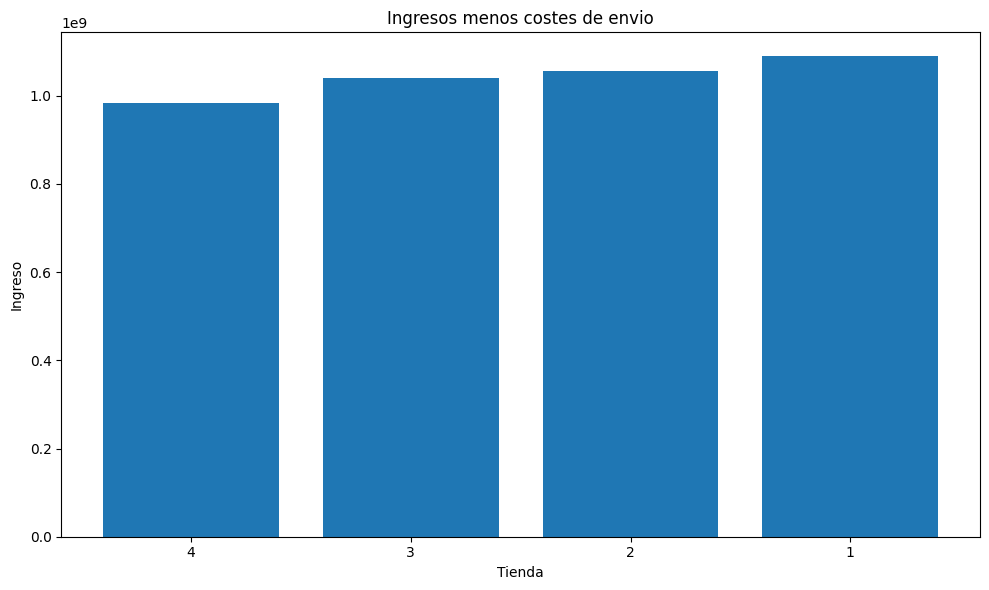

In [98]:
plt.figure(figsize=(10, 6))

plt.bar(x=tabla_ingresos_menos_envios.sort_values(by="Ingreso-Envios")['Tiendas'],
        height=tabla_ingresos_menos_envios.sort_values(by="Ingreso-Envios")['Ingreso-Envios'])

plt.title('Ingresos menos costes de envio')
plt.xlabel('Tienda')
plt.ylabel('Ingreso')

plt.tight_layout()
plt.show()